In [15]:
from bpd.io import load_dataset
import numpy as np

import matplotlib.pyplot as plt 

In [3]:
ds_plus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npz")
ds_minus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npz")

ds_plus['samples']['g1'].shape

(3000,)

In [35]:
boots = np.random.choice(np.arange(3000), size=(5000, 3000), replace=True)

In [36]:
g1p = ds_plus['samples']['g1']
g1m = ds_minus['samples']['g1']

g1ps = g1p[boots]
g1ms = g1m[boots]

g1p.shape, g1ps.shape

((3000,), (5000, 3000))

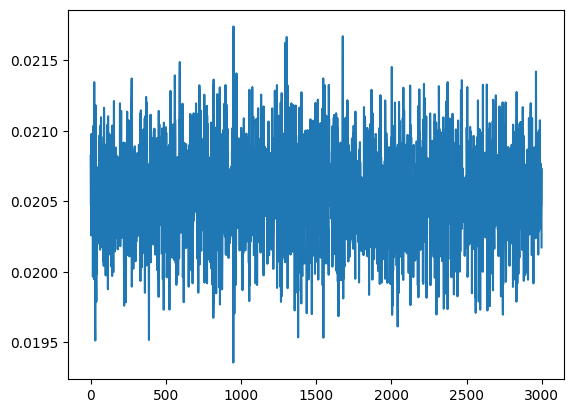

In [56]:
plt.plot(g1p)

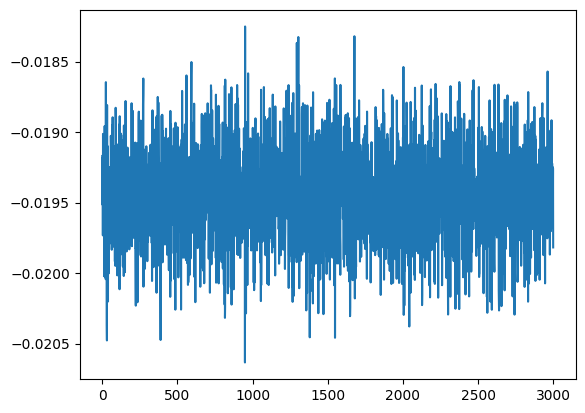

In [57]:
plt.plot(g1m)

In [ ]:
mms = (np.sort(g1p) - np.sort(g1m)) / 2 / 0.02 - 1
mms.std() / 1e-3, mms.mean() / 1e-3

(np.float64(16.683900455073893), np.float64(-0.17723906598729636))

In [37]:
m =  (g1p.mean() - g1m.mean()) / 2 /0.02 - 1
m

np.float64(-0.00017723906598732242)

In [38]:
ms = (g1ps.mean(1) - g1ms.mean(1)) / 2 /0.02 - 1
ms.mean(), ms.std(), ms.shape

(np.float64(-0.00017727330881395722),
 np.float64(1.0185259301780116e-05),
 (5000,))

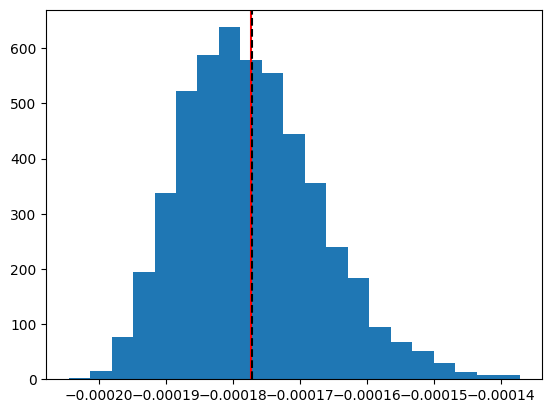

In [39]:
plt.hist(ms, bins=21)
plt.axvline(ms.mean(), c='r')
plt.axvline(m, c='k', ls='--')